# <center> Assignment 3 </center>

#### Name: Mohammed Umar Peera

#### Student ID: 173242560

Given a train set and a test set (without label), the following code implements a neural network model. You may refer to the keras menu: https://keras.io. Please submit the folling in one zip file: (1) Figure for Q1 , (2)code for Q2, (3) result 'pred.csv' for Q2, (4) Figure for Q2. 

### Q1. Draw the structure of the model on a paper. Show clearly the number of layers, and the type of each layer and the specs.

### Q2. Use the training set to tune the model. (You may split the train set into train-valid sets.) To tune the model, you many add/remove layers, set different parameters. 

#### (a)  Your prediction 'pred.csv' will be evaluated by classification accuracy. The accuracy will be compared across your classmates. A higher ranked prediction accuracy will get more scores.
#### (b) Draw the structure of your new model on the paper, and illustrate the difference you have made compared to the given model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip3 install keras-visualizer

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras_visualizer import visualizer 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path="/content/drive/MyDrive/"

digits = pd.read_csv(path+"train.csv")
digitsTest = pd.read_csv(path+"test_nolabel.csv")

digits.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


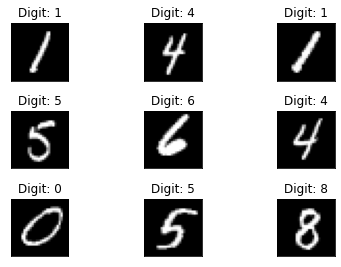

In [4]:
train = digits.values[:,1:]
trainLabels_raw = digits.values[:,0]
test = digitsTest.values[:,:]

## View the top entries as images
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train[i].reshape(28,-1),cmap="gray")
    plt.title("Digit: {}".format(trainLabels_raw[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.close()

In [5]:
# The size of the data
train.shape, trainLabels_raw.shape, test.shape

((6000, 784), (6000,), (1000, 784))

In [6]:
train = train.astype("float32")
train/=255.0
num_categories = 10
trainLabels = keras.utils.np_utils.to_categorical(trainLabels_raw,num_categories)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", input_shape = (28,28,1)
))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(num_categories, activation = "softmax"))

#Complie the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

# Train the model
batch_size = 128
num_epoch = 3
model_log = model.fit(train.reshape(-1,28,28,1), trainLabels,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          )

## Predict the model
ypred = model.predict(test.reshape(-1,28,28,1))

Epoch 1/3
47/47 [==============================] - 13s 266ms/step - loss: 0.8307 - accuracy: 0.7663
Epoch 2/3
47/47 [==============================] - 12s 266ms/step - loss: 0.2796 - accuracy: 0.9197
Epoch 3/3
47/47 [==============================] - 12s 262ms/step - loss: 0.1707 - accuracy: 0.9523


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                92170     
                                                                 
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
__________________________________________________

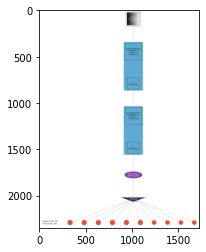

In [8]:
visualizer(model, filename=path+'model_graph1',format='png', view=True)
img = mpimg.imread(path+'model_graph1.png')
imgplot = plt.imshow(img)
plt.show()

In [10]:
# convert output to numbers and store to csv
ypred_num = []
for y in ypred:
    for i in range(10):
        if y[i] == max(y):
            ypred_num.append(i)

with open(path+'pred1.csv', 'w') as file:
    for n in ypred_num:
        file.write("%i\n" % n)

In [11]:
ypred_num

[6,
 2,
 7,
 1,
 7,
 3,
 4,
 3,
 4,
 1,
 0,
 5,
 0,
 2,
 4,
 3,
 8,
 7,
 8,
 9,
 1,
 7,
 1,
 7,
 7,
 0,
 5,
 4,
 7,
 5,
 3,
 4,
 2,
 7,
 0,
 5,
 1,
 4,
 7,
 6,
 9,
 8,
 0,
 9,
 7,
 2,
 1,
 1,
 6,
 2,
 7,
 3,
 3,
 8,
 9,
 2,
 0,
 9,
 6,
 9,
 1,
 2,
 8,
 2,
 7,
 5,
 1,
 1,
 6,
 7,
 0,
 6,
 8,
 0,
 8,
 7,
 1,
 9,
 7,
 7,
 8,
 2,
 7,
 1,
 1,
 1,
 2,
 8,
 6,
 3,
 9,
 3,
 4,
 5,
 8,
 2,
 8,
 3,
 7,
 1,
 9,
 9,
 8,
 9,
 2,
 4,
 6,
 5,
 4,
 0,
 6,
 1,
 0,
 1,
 0,
 4,
 3,
 7,
 7,
 5,
 3,
 6,
 9,
 6,
 5,
 0,
 2,
 9,
 7,
 0,
 5,
 7,
 2,
 1,
 8,
 9,
 1,
 7,
 8,
 9,
 6,
 1,
 9,
 3,
 1,
 9,
 4,
 4,
 1,
 2,
 8,
 3,
 6,
 2,
 9,
 4,
 9,
 2,
 3,
 2,
 2,
 2,
 9,
 8,
 0,
 3,
 0,
 8,
 4,
 4,
 7,
 4,
 3,
 8,
 6,
 3,
 6,
 5,
 1,
 8,
 4,
 9,
 6,
 1,
 0,
 9,
 4,
 8,
 7,
 2,
 9,
 9,
 1,
 3,
 1,
 9,
 4,
 6,
 9,
 3,
 4,
 6,
 2,
 3,
 1,
 6,
 8,
 3,
 4,
 6,
 6,
 2,
 8,
 0,
 1,
 5,
 7,
 9,
 3,
 9,
 8,
 1,
 2,
 4,
 2,
 7,
 9,
 2,
 4,
 8,
 4,
 8,
 7,
 0,
 7,
 8,
 7,
 7,
 6,
 6,
 1,
 1,
 4,
 4,
 4,
 1,
 9,
 6,
 0,
 0,


# Tuned New Model

In [12]:
from tensorflow.keras.optimizers import SGD

In [13]:
train = digits.values[:,1:]
trainLabels_raw = digits.values[:,0]
test = digitsTest.values[:,:]
train = train.astype("float32")
train/=255.0
num_categories = 10
trainLabels = keras.utils.np_utils.to_categorical(trainLabels_raw,num_categories)

# create model
def larger_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
  model.add(Conv2D(64, (6, 6), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(num_categories, activation='softmax'))

  # Compile model
  sgd = SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model

new_model = larger_model()

def train_model(model):
  # Train the model
  batch_size = 128
  num_epoch = 20
  X_train = train.reshape(-1,28,28,1)
  Y_train =  trainLabels

  model_log = model.fit(X_train, Y_train,validation_split=0.33, epochs=num_epoch, batch_size=batch_size)

train_model(new_model)

## Predict the model
ypred = model.predict(test.reshape(-1,28,28,1))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
32/32 [==============================] - 25s 768ms/step - loss: 1.9829 - accuracy: 0.3700 - val_loss: 1.0235 - val_accuracy: 0.6689
Epoch 2/20
32/32 [==============================] - 24s 756ms/step - loss: 0.6128 - accuracy: 0.8079 - val_loss: 0.4132 - val_accuracy: 0.8708
Epoch 3/20
32/32 [==============================] - 24s 756ms/step - loss: 0.3571 - accuracy: 0.8960 - val_loss: 0.3205 - val_accuracy: 0.8965
Epoch 4/20
32/32 [==============================] - 24s 750ms/step - loss: 0.2887 - accuracy: 0.9149 - val_loss: 0.2565 - val_accuracy: 0.9243
Epoch 5/20
32/32 [==============================] - 24s 745ms/step - loss: 0.2196 - accuracy: 0.9328 - val_loss: 0.2289 - val_accuracy: 0.9354
Epoch 6/20
32/32 [==============================] - 24s 763ms/step - loss: 0.1767 - accuracy: 0.9450 - val_loss: 0.2040 - val_accuracy: 0.9394
Epoch 7/20
32/32 [==============================] - 24s 765ms/step - loss: 0.1473 - accuracy: 0.9582 - val_loss: 0.1833 - val_accuracy: 0.9445

In [17]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               819328    
                                                      

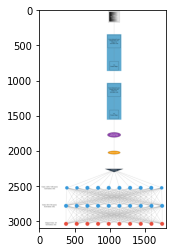

In [14]:
visualizer(new_model, filename=path+'model_graph2',format='png', view=True)
img = mpimg.imread(path+'model_graph2.png')
imgplot = plt.imshow(img)
plt.show()

In [15]:
# convert output to numbers and store to csv
ypred_num = []
for y in ypred:
    for i in range(10):
        if y[i] == max(y):
            ypred_num.append(i)

with open(path+'pred2.csv', 'w') as file:
    for n in ypred_num:
        file.write("%i\n" % n)

In [16]:
ypred_num

[6,
 2,
 7,
 1,
 7,
 3,
 4,
 3,
 4,
 1,
 0,
 5,
 0,
 2,
 4,
 3,
 8,
 7,
 8,
 9,
 1,
 7,
 1,
 7,
 7,
 0,
 5,
 4,
 7,
 5,
 3,
 4,
 2,
 7,
 0,
 5,
 1,
 4,
 7,
 6,
 9,
 8,
 0,
 9,
 7,
 2,
 1,
 1,
 6,
 2,
 7,
 3,
 3,
 8,
 9,
 2,
 0,
 9,
 6,
 9,
 1,
 2,
 8,
 2,
 7,
 5,
 1,
 1,
 6,
 7,
 0,
 6,
 8,
 0,
 8,
 7,
 1,
 9,
 7,
 7,
 8,
 2,
 7,
 1,
 1,
 1,
 2,
 8,
 6,
 3,
 9,
 3,
 4,
 5,
 8,
 2,
 8,
 3,
 7,
 1,
 9,
 9,
 8,
 9,
 2,
 4,
 6,
 5,
 4,
 0,
 6,
 1,
 0,
 1,
 0,
 4,
 3,
 7,
 7,
 5,
 3,
 6,
 9,
 6,
 5,
 0,
 2,
 9,
 7,
 0,
 5,
 7,
 2,
 1,
 8,
 9,
 1,
 7,
 8,
 9,
 6,
 1,
 9,
 3,
 1,
 9,
 4,
 4,
 1,
 2,
 8,
 3,
 6,
 2,
 9,
 4,
 9,
 2,
 3,
 2,
 2,
 2,
 9,
 8,
 0,
 3,
 0,
 8,
 4,
 4,
 7,
 4,
 3,
 8,
 6,
 3,
 6,
 5,
 1,
 8,
 4,
 9,
 6,
 1,
 0,
 9,
 4,
 8,
 7,
 2,
 9,
 9,
 1,
 3,
 1,
 9,
 4,
 6,
 9,
 3,
 4,
 6,
 2,
 3,
 1,
 6,
 8,
 3,
 4,
 6,
 6,
 2,
 8,
 0,
 1,
 5,
 7,
 9,
 3,
 9,
 8,
 1,
 2,
 4,
 2,
 7,
 9,
 2,
 4,
 8,
 4,
 8,
 7,
 0,
 7,
 8,
 7,
 7,
 6,
 6,
 1,
 1,
 4,
 4,
 4,
 1,
 9,
 6,
 0,
 0,
